In [1]:
import xnemogcm
import xgcm
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from matplotlib.colors import LogNorm
import gsw
import cmocean.cm as cmo
import xarray as xr
import datetime
import cmasher as cmr
import matplotlib.colors as mcolors
xr.set_options(keep_attrs=True)
plt.rcParams['font.size']=14

# SSH mean -Maud36

In [2]:
# path to the stored data
path36=('../../MAUD_RISE_config/maud_v4/m36_ke2/')

ds36=xr.open_mfdataset(path36+'ssh*_m36.nc')
bat=xr.open_dataset('../../MAUD_RISE_config/maud_v4/m36_mask/1_domain_cfg_50levels_new.nc')
bat.coords['nav_lon']=bat.nav_lon.mean(dim='y')
bat.coords['nav_lat']=bat.nav_lat.mean(dim='x')
bat=bat.swap_dims({'x':'x_c','y':'y_c'})
ds36=xr.merge((ds36,bat.bathy_meter))
sshmean=ds36.zos.mean(dim='t')
sshmean.load()

/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'zos' (y_c: 804, x_c: 879)>
array([[ 0.       ,  0.       ,  0.       , ...,        nan,        nan,
               nan],
       [ 0.       ,  0.       ,  0.       , ...,        nan,        nan,
               nan],
       [ 0.       ,  0.       ,  0.       , ...,        nan,        nan,
               nan],
       ...,
       [ 0.       , -1.8921385, -1.8921385, ..., -1.7652967, -1.7652967,
         0.       ],
       [ 0.       , -1.8921385, -1.8921385, ..., -1.7652967, -1.7652967,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)
Coordinates:
  * x_c      (x_c) int64 0 1 2 3 4 5 6 7 8 ... 871 872 873 874 875 876 877 878
  * y_c      (y_c) int64 0 1 2 3 4 5 6 7 8 ... 796 797 798 799 800 801 802 803
    glamt    (y_c, x_c) float64 -5.111 -5.0 -4.972 -4.944 ... 19.31 19.33 19.36
    gphit    (y_c, x_c) float64 -70.54 -70.54 -70.54 ... -61.55 -61.55 -61.55
    nav_lon  (x_c) float32 -5.111 -5.0 -4.972 -4.944 ... 19.28 19.31 19.33 19.36
    nav_lat  (y_c) float32 -70.54 -70.5 -70.49 -70.48 ... -61.58 -61.57 -61.55
Attributes:
    standard_name:       sea_surface_height_above_geoid
    long_name:           sea surface height
    units:               m
    online_operation:    average
    interval_operation:  120 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 120 s)
    arakawa_point_type:  T
    coordinates:         nav_lat nav_lon

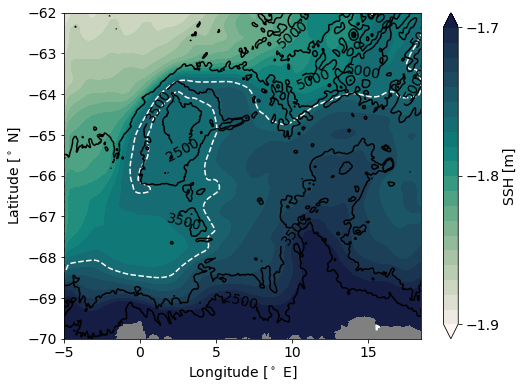

In [3]:
# Figure 9 of the manuscript
fig,axes=plt.subplots(1,1,figsize=(8,6),sharey=True)
ax=axes
sshmean.plot.contourf(x="glamt",y="gphit",vmin=-1.9,vmax=-1.7,levels=21,cmap=cmo.tempo,
                                                      cbar_kwargs={'label':'SSH [m]','ticks':np.arange(-1.9,-1.6,0.1)})
sshmean.plot.contour(x="glamt",y="gphit",levels=[-1.76],colors='w')
c=ds36.bathy_meter.plot.contour(x="glamt",y="gphit",ax=ax,levels=[2500,3500,5000],colors='k',alpha=1)
ds36.bathy_meter.where(ds36.bathy_meter<2).plot.contourf(x="glamt",y="gphit",ax=ax,colors='gray',add_colorbar=False)
ax.set_xlabel('Longitude [$^\circ$ E]')
ax.set_ylabel('Latitude [$^\circ$ N]')
ax.clabel(c,fmt='%d')
ax.set_xlim(-5,18.5)
ax.set_ylim(-70,-62)
plt.savefig('./SSHmean_m36.jpg',dpi=300)